<a href="https://www.kaggle.com/code/awesomeharris/top-ds-youtubers-and-trend-insights?scriptVersionId=136823390" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kaggle AI Report - Top YouTubers in Data Science Field

I am sure most of us, at some point in our data science journey, have stumbled upon YouTube videos in our quest for knowledge. YouTube has become an invaluable resource for individuals interested in the field of data science, providing a platform for experts and enthusiasts to share their expertise, insights, and tutorials. 

When it comes to the top YouTubers in the data science field, several names stand out for their exceptional content and contributions. These individuals have amassed substantial followings and have established themselves as authorities in the data science community. They offer a diverse range of perspectives, expertise, and teaching styles, ensuring that there is something for everyone.

So, let's dive in and discover the captivating world of data science YouTubers!

In [1]:
import pandas as pd
pd.set_option("display.max_rows", 5)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import JSON, display, HTML
from googleapiclient.discovery import build
from kaggle_secrets import UserSecretsClient
import datetime
import re
import ast
import emoji
import warnings
warnings.filterwarnings('ignore')
import calendar
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig, pipeline
from scipy.special import softmax
from collections import Counter

def scrolling(df):
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
                 df.to_html() + #df.style.render() +
                 "</div>"))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Setting up YouTube api key and list of YouTubers

Here i am using the YouTube API to scrape data from Youtube channels subscribed by me personally. Had to do some research and added a dozen more. (may have to omit some of the youtube channels with more than 1000 videos 😂)

(Expand to see the codes!)

In [2]:
secret_label = "youtube-api"
api_key = UserSecretsClient().get_secret(secret_label)

channel_ids = ['UCJQJAI7IjbLcpsjWdSzYz0Q', # @Thuvu5
               'UCxladMszXan-jfgzyeIMyvw', # @robmulla
               'UCiT9RITQ9PW6BhXK0y2jaeg', # @KenJee_ds
               'UCNU_lfiiWBdtULKOw6X0Dig', # @krishnaik06
               'UCKMjvg6fB6WS5WrPtbV4F5g', # @KylieYYing
               'UCWN3xxRkmTPmbKwht9FuE5A', # @SirajRaval
               'UCR68xPzQK7Etq2YfJ6Oe_2A', # @thedatajanitor9537
               'UCtslD4DGH6PKyG_1gFAX7sg', # @AAmini
               'UCcIXc5mJsHVYTZR1maL5l9w', # @Deeplearningai
               'UCAWsBMQY4KSuOuGODki-l7A', # @emma_ding
               'UCJublDh2UsiIKsAE1553miw', # @GregHogg
               'UCSNeZleDn9c74yQc-EKnVTA', # @kaggle
               'UCq6XkhO5SZ66N04IcPbqNcw', # @KeithGalli
               'UCfzlCWGWYyIQ0aLC5w48gBQ', # @sentdex
               'UCV8e2g4IWQqK71bbzGDEI4Q', # @DataProfessor
               'UCbfYPyITQ-7l4upoX8nvctg', # @TwoMinutePapers
               'UC2UXDak6o7rBm23k3Vv5dww', # @TinaHuang1
               'UC79Gv3mYp6zKiSwYemEik9A', # @DataCamp 
               'UCzL_0nIe8B4-7ShhVPfJkgw', # @Datasciencedojo
               'UCnVzApLJE2ljPZSeQylSEyg', # @dataschool
               'UCFrjdcImgcQVyFbK04MBEhA', # @BrandonFoltz
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # @LukeBarousse
               'UCBPRJjIWfyNG4X-CRbnv78A', # @abhishekkrthakur
               'UCEBpSZhI1X8WaP-kY_2LLcg', # @365DataScience
               'UCtYLUTtgS3k1Fg4y5tAhLbw', # @statquest
               'UC4JX40jDee_tINbkjycV4Sg', # @TechWithTim
               'UCQSMCVUX1HgrwxJhO_7VrJQ', # @DataInterview
               'UCDvErgK0j5ur3aLgn6U-LqQ', # @DataTalksClub
               'UCYQS3jkfB79Diyr9sQJAj5Q', # @landingai
               'UCBqMxo5ch1NN0hZsM58gf6Q', # @ReuvenLerner
               'UC7kjWIK1H8tfmFlzZO-wHMw', # @twimlai
               'UCBpxspUNl1Th33XbugiHJzw', # @MITCSAIL
               'UCHB9VepY6kYvZjj0Bgxnpbw', # @connorshorten6311
               'UCEqgmyWChwvt6MFGGlmUQCQ', # @allenai
               'UCqrILQNl5Ed9Dz6CGMyvMTQ', # @CleverProgrammer
               'UCrBzGHKmGDcwLFnQGHJ3XYg', # @giantneuralnetwork
               'UCY8mzqqGwl5_bTpBY9qLMAA', # @andreaskayy
               'UC12LqyqTQYbXatYS9AA7Nuw', # @machinelearninguniversity1942
               'UCHlNU7kIZhRgSbhHvFoy72w', # @HuggingFace
               'UCJS9pqu9BzkAMNTmzNMNhvg', # @googlecloudtech
               'UCXZCJLdBC09xxGZ6gcdrc6A', # @OpenAI
              ]
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

kudos to @Thuvu5 for the neat functions. saved me a lot of time! 😁

In [3]:
def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    Reference:
    https://developers.google.com/youtube/v3/docs/channels#resource
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'handle': item['snippet']['customUrl'],
                'created': item['snippet']['publishedAt'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return pd.DataFrame(all_data)

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids
    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

## List of my top DS YouTube channels 🏆

In [4]:
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats[['subscribers','views','totalVideos']] = \
    channel_stats[['subscribers','views','totalVideos']].astype(int)
channel_stats = channel_stats.sort_values(by="subscribers", ascending=False).reset_index(drop=True)
channel_stats.loc[:, "subscribers"] =channel_stats["subscribers"].map('{:,.0f}'.format)
channel_stats.loc[:, "views"] =channel_stats["views"].map('{:,.0f}'.format)
channel_stats['created'] = pd.to_datetime(channel_stats['created'].astype(str).str[:10]).dt.date
scrolling(channel_stats)

In [5]:
plt.figure(figsize=(10, 8))
channel_stats['subscribers'] = channel_stats['subscribers'].astype(str).str.replace(",","").astype(int)
sns.barplot(x='subscribers', y='channelName', data=channel_stats, orient='h')
plt.title('Subscribers by Channel')
plt.xlabel('Subscribers')
plt.ylabel('Channel Name')
plt.show()

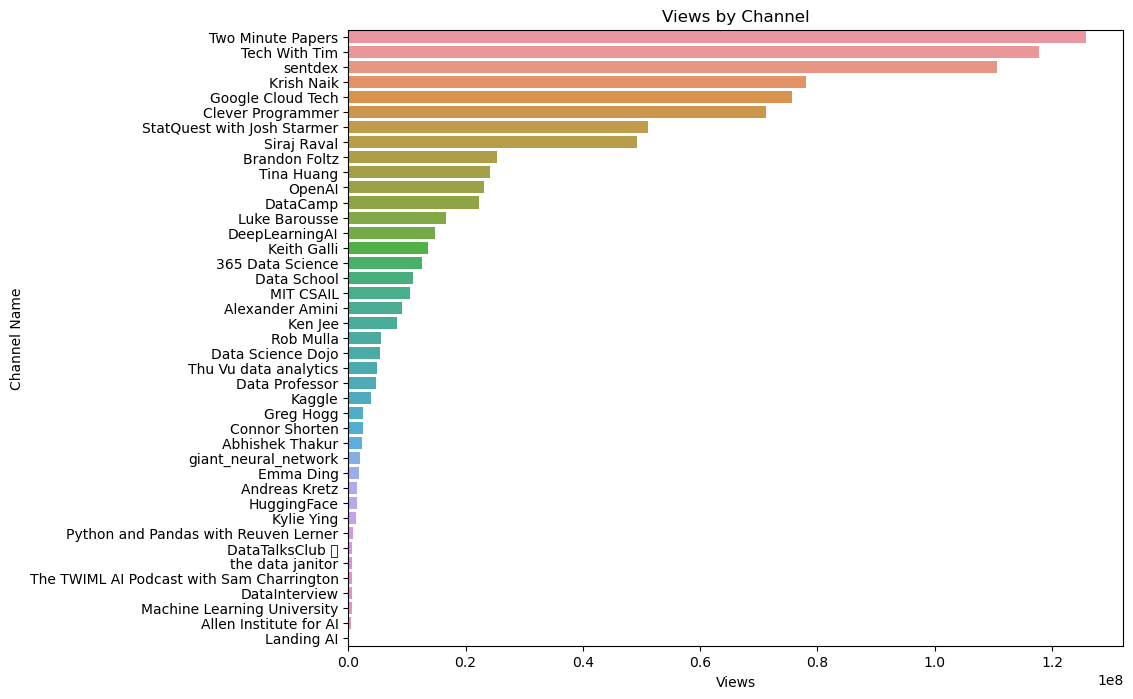

In [6]:
plt.figure(figsize=(10, 8))
channel_stats['views'] = channel_stats['views'].astype(str).str.replace(",","").astype(int)
channel_stats = channel_stats.sort_values(by="views", ascending=False)
sns.barplot(x='views', y='channelName', data=channel_stats, orient='h')
plt.title('Views by Channel')
plt.xlabel('Views')
plt.ylabel('Channel Name')
plt.show()

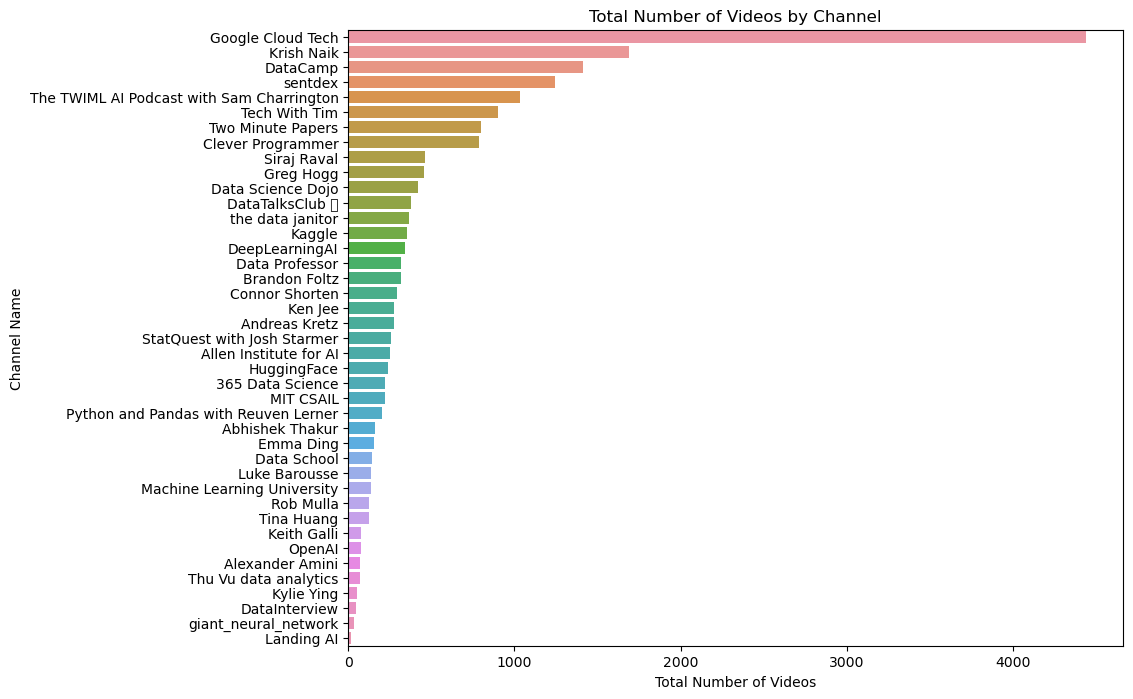

In [7]:
plt.figure(figsize=(10, 8))
channel_stats['totalVideos'] = channel_stats['totalVideos'].astype(str).str.replace(",","").astype(int)
channel_stats = channel_stats.sort_values(by="totalVideos", ascending=False)
sns.barplot(x='totalVideos', y='channelName', data=channel_stats, orient='h')
plt.title('Total Number of Videos by Channel')
plt.xlabel('Total Number of Videos')
plt.ylabel('Channel Name')
plt.show()

## Further data scraping using YouTube API

In [8]:
%%time
# Get video IDs
video_ids = []
for id in channel_stats['playlistId']:
    video_ids += get_video_ids(youtube, id)
len(video_ids)

CPU times: user 972 ms, sys: 53.5 ms, total: 1.03 s
Wall time: 1min 5s


19346

In [9]:
%%time
# Get video details
video_df = get_video_details(youtube, video_ids[0:]).drop(columns=['favouriteCount','definition','caption','duration'])
video_df.head(3)

CPU times: user 2.64 s, sys: 156 ms, total: 2.8 s
Wall time: 1min 7s


video_id       channelTitle  \
0  2zjHclQenA0  Google Cloud Tech   
1  QsduU4FDTLs  Google Cloud Tech   
2  kFLVaPIDXdU  Google Cloud Tech   

                                               title  \
0  Architecting a blockchain startup with Google ...   
1                       ABCs of #AI - G is for #GLaM   
2          The data professional in the era of GenAI   

                                         description  \
0  Here to bring you the latest news in the start...   
1  Welcome to ABC’s of AI, where we’ll cover the ...   
2  Welcome to our latest video on "AI: The Future...   

                                                tags           publishedAt  \
0  [Google Cloud, Startup, Startups, GCP, VC, Ser...  2023-07-13T23:00:02Z   
1                                               None  2023-07-13T16:00:03Z   
2                                               None  2023-07-12T23:00:31Z   

  viewCount likeCount commentCount  
0      1103        36            3  
1      1263        59            3  
2      1783        65            2

In [10]:
video_df.shape

(19346, 9)

## Some data preprocessing...

In [11]:
# ignore the "tweets" lol. copy + paste from my twitter sentiment analysis notebook haha

def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.()[]:;')
    
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)


def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)|😉', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet


def remove_emoji(tweet):
    return emoji.replace_emoji(tweet, replace=" ")


def preprocess_sentence(tweet):
    processed_tweet = []
    # Convert to lower case
    tweet = tweet.lower()
    
    #Clean only digits
    tweet = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", tweet)
    
    # Replaces URLs with the word URL
    #tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', tweet)
    
    # Replace @handle with the word USER_MENTION
    #tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    tweet = re.sub(r'@[\S]+', '', tweet)
    
    # Replaces #hashtag with hashtag
    #tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    tweet = re.sub(r'#(\S+)', '', tweet)
    
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')

    # Replace emojis with either EMO_POS or EMO_NEG
    #tweet = handle_emojis(tweet)

    #remove emojis
    tweet = remove_emoji(tweet)
    
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()

    for word in words:
        word = preprocess_word(word)
        processed_tweet.append(word)

    return ' '.join(processed_tweet)

def get_unique_words(string):
    words = string.split()  # Split the string into a list of words
    unique_words = set()  # Create an empty set
    result = []

    for word in words:
        if word not in unique_words:
            unique_words.add(word)  # Add word to the set
            result.append(word)  # Add word to the result list

    return ' '.join(result)

In [12]:
# Clean & transform the dataframe
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'].astype(str).str[:10]).dt.date
video_df['year'] = pd.to_datetime(video_df['publishedAt']).dt.year
video_df['month'] = pd.to_datetime(video_df['publishedAt']).dt.month
video_df['day'] = pd.to_datetime(video_df['publishedAt']).dt.day
video_df['day_of_week'] = pd.to_datetime(video_df['publishedAt']).dt.dayofweek
video_df['year-month'] = video_df['publishedAt'].astype(str).str[:7]
video_df['processed_title'] = video_df['title'].apply(preprocess_sentence)
video_df['processed_desc'] = video_df['description'].apply(preprocess_sentence)
video_df['tags'] = video_df['tags'].astype(str)
video_df['processed_tags'] = video_df['tags'].apply(preprocess_sentence)
video_df['concat_words'] = video_df['processed_title']+video_df['processed_tags']
video_df['concat_word'] = video_df['concat_words'].apply(get_unique_words)
video_df = video_df.sort_values(by="publishedAt", ascending=False)

In [13]:
video_df.head(3)

video_id       channelTitle  \
4443   zS1QUCvAkpE         Krish Naik   
10665  AjkiBRNVeV8  Two Minute Papers   
19329  z0JJkoDW1UI         Landing AI   

                                                   title  \
4443   The Power Of ChatGPT Plugins|Check This Powerf...   
10665    NVIDIA Did It: Ray Tracing 10,000 Times Faster!   
19329      Why Use a Cloud Platform for Computer Vision?   

                                             description  \
4443   ChatGPT. Plugins are tools designed specifical...   
10665  ❤️ Check out Lambda here and sign up for their...   
19329  Learn about the benefits of using a cloud plat...   

                                                    tags publishedAt  \
4443   ['yt:cc=on', 'chatgpt plugins demo', 'power of...  2023-07-15   
10665            ['ray tracing', 'nvidia', 'nvidia rtx']  2023-07-14   
19329                                               None  2023-07-14   

      viewCount likeCount commentCount  year  month  day  day_of_week  \
4443        753        52            6  2023      7   15            5   
10665     90269      5239          355  2023      7   14            4   
19329        20         1            0  2023      7   14            4   

      year-month                                    processed_title  \
4443     2023-07  the power of chatgpt plugins|check this powerf...   
10665    2023-07       nvidia did it ray tracing 10,00 times faster   
19329    2023-07       why use a cloud platform for computer vision   

                                          processed_desc  \
4443   chatgpt plugins are tools designed specificall...   
10665  check out lambda here and sign up for their gp...   
19329  learn about the benefits of using a cloud plat...   

                                          processed_tags  \
4443   yt:cc=on chatgpt plugins demo power of chatgpt...   
10665                      ray tracing nvidia nvidia rtx   
19329                                               none   

                                            concat_words  \
4443   the power of chatgpt plugins|check this powerf...   
10665  nvidia did it ray tracing 10,00 times fasterra...   
19329   why use a cloud platform for computer visionnone   

                                             concat_word  
4443   the power of chatgpt plugins|check this powerf...  
10665  nvidia did it ray tracing 10,00 times fasterra...  
19329   why use a cloud platform for computer visionnone

# Exploratory Data Analysis

Let's looks at data in the past 10 years.

In [14]:
df1 = video_df.copy().groupby(['channelTitle','year','year-month'])['video_id'].count().reset_index()
df1 = df1.rename(columns={'video_id':'video_count'})
df1['year-month'] = pd.to_datetime(df1['year-month'])
df1 = df1[df1['year']>2013]

In [15]:
import plotly.graph_objects as go

# Create a figure and define the layout
fig = go.Figure()

# Iterate over unique channel titles
for channel_title in df1['channelTitle'].unique():
    # Filter data for the current channel title
    channel_data = df1[df1['channelTitle'] == channel_title]
    
    # Extract x and y values
    x = channel_data['year-month']
    y = channel_data['video_count']
    
    # Add trace for each channel title
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=channel_title))
    
# Update layout
fig.update_layout(
    title='Video Count by Channel',
    xaxis_title='Year-Month',
    yaxis_title='Video Count',
    hovermode='x',
    legend=dict(
        x=0,
        y=-0.1,
        orientation='h',
        bgcolor='rgba(255, 255, 255, 0.5)'),
    width=1050, 
    height=800 
)

# Show the plot
fig.show()

Interestingly, from my small population of DS Youtube channels, the number of new channels only started to pick up  in 2017. What heppened then? 


# WorldClouds for YouTube Titles and Tags in the Past 10 Years! 🤯


In [16]:
# some helper functions for wordclouds

def get_top_words(df, col, num_words, exclude_words):
    word_counts = Counter()
    for text in df[col]:
        if isinstance(text, str):  # Check if text is a valid string
            words = text.lower().split()
            words = [word for word in words if word not in exclude_words]
            word_counts.update(words)
    top_words = word_counts.most_common(num_words)
    return top_words


def wordcloudplot(df, col, nos, title):
    df[col] = df[col].str.replace('[^\w\s]', '')
    stopwords_list = stopwords.words('english')
    additional_exclude_words = ['like',"n't",'use','using','get','one','amp','could','would','im','even',\
                                'none','data','science','course','courses','python','machine','learning','learn',\
                                'video','best','role','facebook','twitter','subscribe','programming','tutorial',\
                                'scientist','scientists','two','minute','papers','paper','paperstwo','coding',\
                                'beginners','google','cloud','gcp','analysis']
    exclude_words = set(stopwords_list + additional_exclude_words)
    top_words = get_top_words(df, col, nos, exclude_words)
    wordcloud = WordCloud(width=800, 
                          height=400,
                          contour_width=3,
                          contour_color='midnightblue', 
                          background_color="white").generate_from_frequencies(dict(top_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16, pad=20, y=-0.15) 
    plt.show()
    

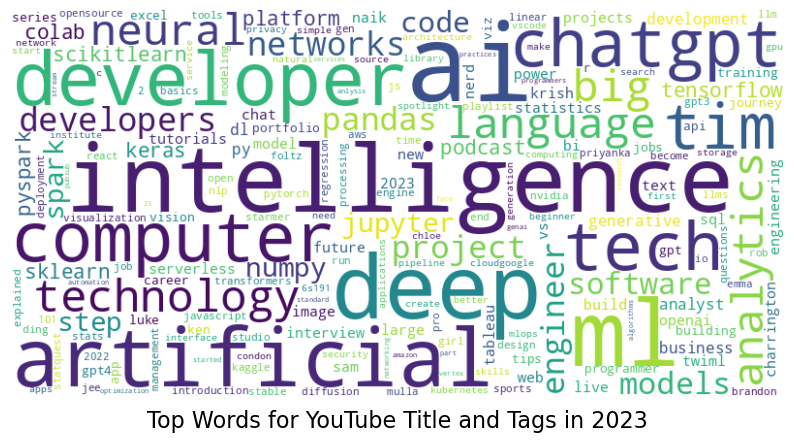

In [17]:
df_2023 = video_df[video_df['year']== 2023]
wordcloudplot(df_2023, "concat_word", 500, "Top Words for YouTube Title and Tags in 2023")

In [18]:
df_2022 = video_df[video_df['year']== 2022]
wordcloudplot(df_2022, "concat_word", 500, "Top Words for YouTube Title in 2022")

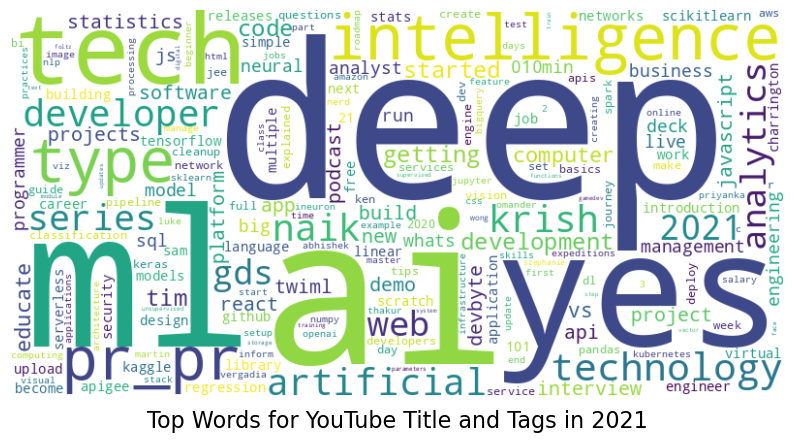

In [19]:
df_2021 = video_df[video_df['year']== 2021]
wordcloudplot(df_2021, "concat_word", 500, "Top Words for YouTube Title and Tags in 2021")

In [20]:
df_2020 = video_df[video_df['year']== 2020]
wordcloudplot(df_2020, "concat_word", 500, "Top Words for YouTube Title and Tags in 2020")

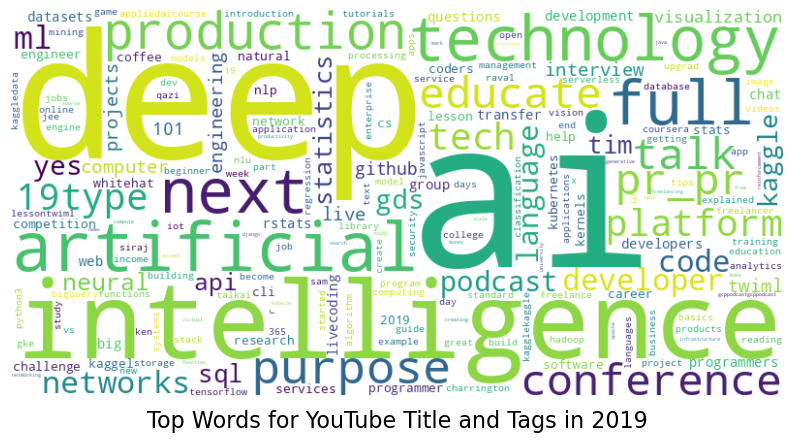

In [21]:
df_2019 = video_df[video_df['year']== 2019]
wordcloudplot(df_2019, "concat_word", 500, "Top Words for YouTube Title and Tags in 2019")

In [22]:
df_2018 = video_df[video_df['year']== 2018]
wordcloudplot(df_2018, "concat_word", 500, "Top Words for YouTube Title and Tags in 2018")

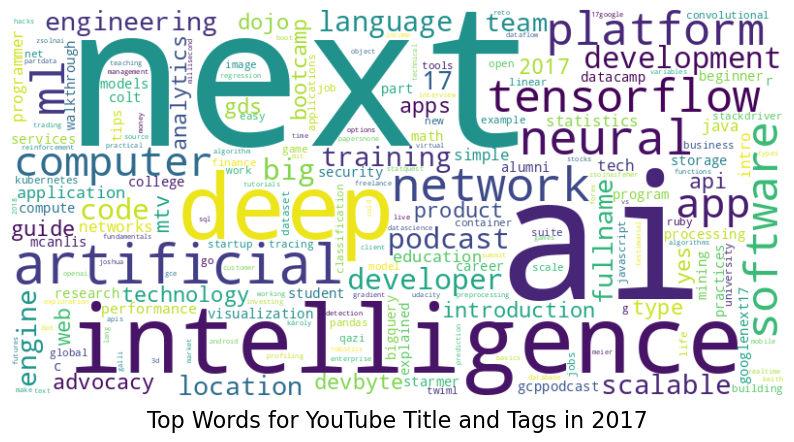

In [23]:
df_2017 = video_df[video_df['year']== 2017]
wordcloudplot(df_2017, "concat_word", 500, "Top Words for YouTube Title and Tags in 2017")

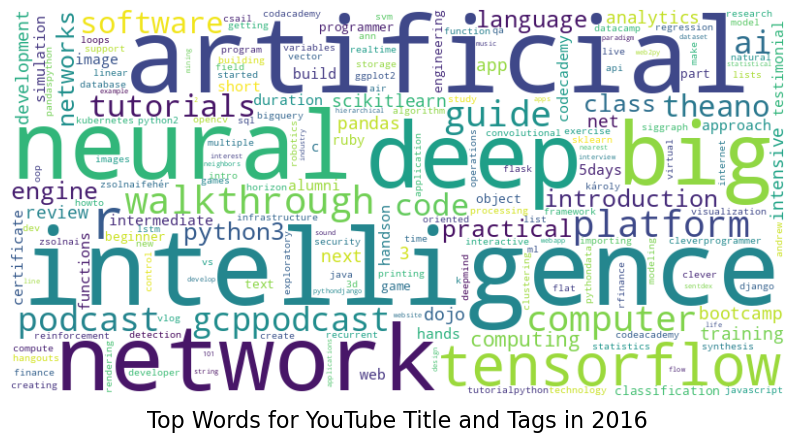

In [24]:
df_2016 = video_df[video_df['year']== 2016]
wordcloudplot(df_2016, "concat_word", 500, "Top Words for YouTube Title and Tags in 2016")

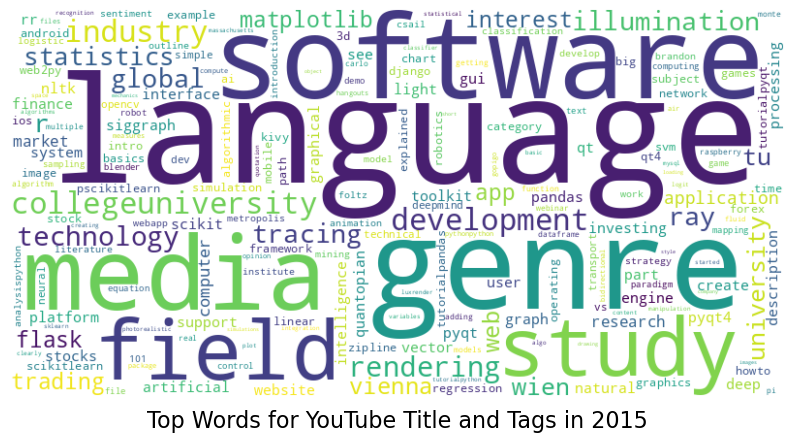

In [25]:
df_2015 = video_df[video_df['year']== 2015]
wordcloudplot(df_2015, "concat_word", 500, "Top Words for YouTube Title and Tags in 2015")

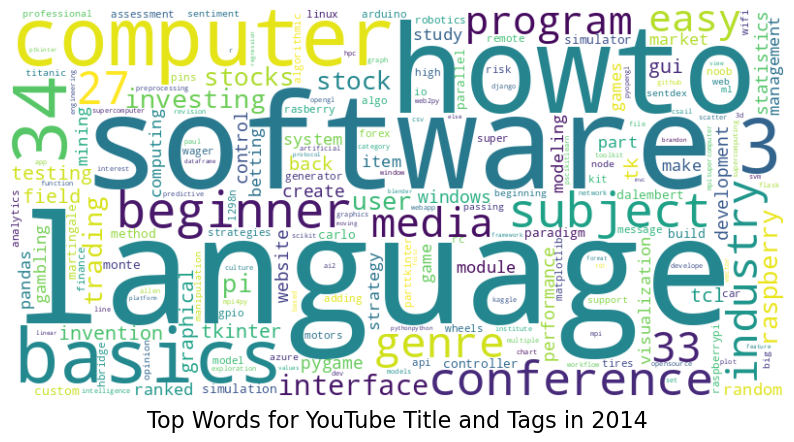

In [26]:
df_2014 = video_df[video_df['year']== 2014]
wordcloudplot(df_2014, "concat_word", 500, "Top Words for YouTube Title and Tags in 2014")

I have filtered out some common words like "data" and "science" so we can see past the haze in the wordclouds. 

Not many channels included in my list before 2017 tho so the results are not so interesting.

In [27]:
video_df.to_csv("video_df.csv")
df1.to_csv("df1.csv")

# After thoughts

This was a last minute effort to submit in this competition as I saw the chance to try out the Youtube api and I thought it would be interesting to include all channels I could find and slam it inside this report.

Turns out that the api is kinda unstable in retreiving too many video_ids at once where some get lost on the way so I had to ditch some of those channels with more than 1000 vids. Tried a few times and the total retrieved ids are always different who knows how many ids will turn out in my kernel after I click the saved version. 🤣 




**Version history:**
- version 2: gave it a try to include all channels that have more than 1000 vids! fingers crossed!    
- version 3: seems like the api successfully captured more video_ids! also adjusted the wordclouds ban word list
